<a href="https://colab.research.google.com/github/wrn6494/-8-Week-SQL-Challenge/blob/main/Case_Study_2_Pizza_Runner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **8 Week SQL Challenge : Case Study #2 - Pizza Runner**

Full case study available [here.](https://8weeksqlchallenge.com/case-study-2/)

**Probem Statement/Business Task**

Give Danny assistance to clean his data and apply some basic calculations so he can better direct his runners and optimise Pizza Runner’s operations.

**Schema (PostgreSQL v13)**

    CREATE SCHEMA pizza_runner;
    SET search_path = pizza_runner;
    
    DROP TABLE IF EXISTS runners;
    CREATE TABLE runners (
      "runner_id" INTEGER,
      "registration_date" DATE
    );
    INSERT INTO runners
      ("runner_id", "registration_date")
    VALUES
      (1, '2021-01-01'),
      (2, '2021-01-03'),
      (3, '2021-01-08'),
      (4, '2021-01-15');
    
    
    DROP TABLE IF EXISTS customer_orders;
    CREATE TABLE customer_orders (
      "order_id" INTEGER,
      "customer_id" INTEGER,
      "pizza_id" INTEGER,
      "exclusions" VARCHAR(4),
      "extras" VARCHAR(4),
      "order_time" TIMESTAMP
    );
    
    INSERT INTO customer_orders
      ("order_id", "customer_id", "pizza_id", "exclusions", "extras", "order_time")
    VALUES
      ('1', '101', '1', '', '', '2020-01-01 18:05:02'),
      ('2', '101', '1', '', '', '2020-01-01 19:00:52'),
      ('3', '102', '1', '', '', '2020-01-02 23:51:23'),
      ('3', '102', '2', '', NULL, '2020-01-02 23:51:23'),
      ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
      ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
      ('4', '103', '2', '4', '', '2020-01-04 13:23:46'),
      ('5', '104', '1', 'null', '1', '2020-01-08 21:00:29'),
      ('6', '101', '2', 'null', 'null', '2020-01-08 21:03:13'),
      ('7', '105', '2', 'null', '1', '2020-01-08 21:20:29'),
      ('8', '102', '1', 'null', 'null', '2020-01-09 23:54:33'),
      ('9', '103', '1', '4', '1, 5', '2020-01-10 11:22:59'),
      ('10', '104', '1', 'null', 'null', '2020-01-11 18:34:49'),
      ('10', '104', '1', '2, 6', '1, 4', '2020-01-11 18:34:49');
    
    
    DROP TABLE IF EXISTS runner_orders;
    CREATE TABLE runner_orders (
      "order_id" INTEGER,
      "runner_id" INTEGER,
      "pickup_time" VARCHAR(19),
      "distance" VARCHAR(7),
      "duration" VARCHAR(10),
      "cancellation" VARCHAR(23)
    );
    
    INSERT INTO runner_orders
      ("order_id", "runner_id", "pickup_time", "distance", "duration", "cancellation")
    VALUES
      ('1', '1', '2020-01-01 18:15:34', '20km', '32 minutes', ''),
      ('2', '1', '2020-01-01 19:10:54', '20km', '27 minutes', ''),
      ('3', '1', '2020-01-03 00:12:37', '13.4km', '20 mins', NULL),
      ('4', '2', '2020-01-04 13:53:03', '23.4', '40', NULL),
      ('5', '3', '2020-01-08 21:10:57', '10', '15', NULL),
      ('6', '3', 'null', 'null', 'null', 'Restaurant Cancellation'),
      ('7', '2', '2020-01-08 21:30:45', '25km', '25mins', 'null'),
      ('8', '2', '2020-01-10 00:15:02', '23.4 km', '15 minute', 'null'),
      ('9', '2', 'null', 'null', 'null', 'Customer Cancellation'),
      ('10', '1', '2020-01-11 18:50:20', '10km', '10minutes', 'null');
    
    
    DROP TABLE IF EXISTS pizza_names;
    CREATE TABLE pizza_names (
      "pizza_id" INTEGER,
      "pizza_name" TEXT
    );
    INSERT INTO pizza_names
      ("pizza_id", "pizza_name")
    VALUES
      (1, 'Meatlovers'),
      (2, 'Vegetarian');
    
    
    DROP TABLE IF EXISTS pizza_recipes;
    CREATE TABLE pizza_recipes (
      "pizza_id" INTEGER,
      "toppings" TEXT
    );
    INSERT INTO pizza_recipes
      ("pizza_id", "toppings")
    VALUES
      (1, '1, 2, 3, 4, 5, 6, 8, 10'),
      (2, '4, 6, 7, 9, 11, 12');
    
    
    DROP TABLE IF EXISTS pizza_toppings;
    CREATE TABLE pizza_toppings (
      "topping_id" INTEGER,
      "topping_name" TEXT
    );
    INSERT INTO pizza_toppings
      ("topping_id", "topping_name")
    VALUES
      (1, 'Bacon'),
      (2, 'BBQ Sauce'),
      (3, 'Beef'),
      (4, 'Cheese'),
      (5, 'Chicken'),
      (6, 'Mushrooms'),
      (7, 'Onions'),
      (8, 'Pepperoni'),
      (9, 'Peppers'),
      (10, 'Salami'),
      (11, 'Tomatoes'),
      (12, 'Tomato Sauce');

**Entity Relationship Diagram**

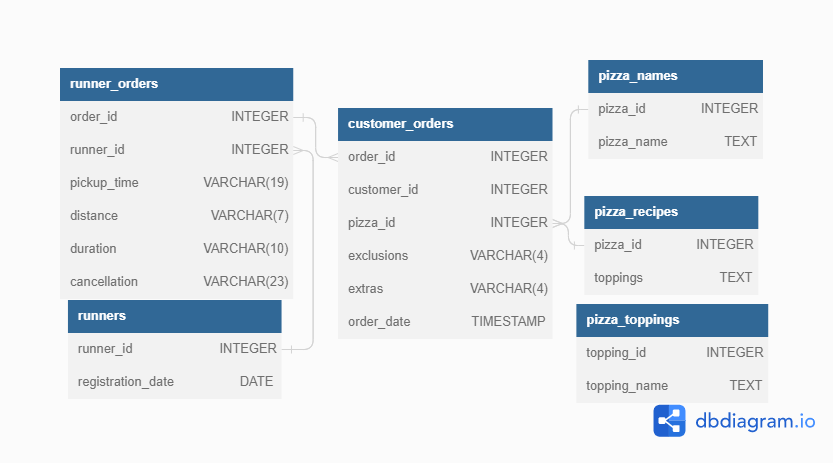

**Case Study Questions**

**A. Pizza Metrics**


1. How many pizzas were ordered?
2. How many unique customer orders were made?
3. How many successful orders were delivered by each runner?
4. How many of each type of pizza was delivered?
5. How many Vegetarian and Meatlovers were ordered by each customer?
6. What was the maximum number of pizzas delivered in a single order?
7. For each customer, how many delivered pizzas had at least 1 change and how many had no changes?
8. How many pizzas were delivered that had both exclusions and extras?
9. What was the total volume of pizzas ordered for each hour of the day?
10. What was the volume of orders for each day of the week?

**B. Runner and Customer Experience**

1. How many runners signed up for each 1 week period? (i.e. week starts 2021-01-01)
2. What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?
3. Is there any relationship between the number of pizzas and how long the order takes to prepare?
4. What was the average distance travelled for each customer?
5. What was the difference between the longest and shortest delivery times for all orders?
6. What was the average speed for each runner for each delivery and do you notice any trend for these values?
7. What is the successful delivery percentage for each runner?


**C. Ingredient Optimisation**

1. What are the standard ingredients for each pizza?
2. What was the most commonly added extra?
3. What was the most common exclusion?
4. Generate an order item for each record in the customers_orders table in the format of one of the following:


          *  Meat Lovers
          *  Meat Lovers - Exclude Beef
          *  Meat Lovers - Extra Bacon
          *  Meat Lovers - Exclude Cheese, Bacon - Extra Mushroom, Peppers


5. Generate an alphabetically ordered comma separated ingredient list for each pizza order from the customer_orders table and add a 2x in front of any relevant ingredients

    For example: "Meat Lovers: 2xBacon, Beef, ... , Salami"
6. What is the total quantity of each ingredient used in all delivered pizzas sorted by most frequent first?

**D. Pricing and Ratings**

1. If a Meat Lovers pizza costs 12 dollars and Vegetarian costs 10 dollars and there were no charges for changes - how much money has Pizza Runner made so far if there are no delivery fees?
2. What if there was an additional 1 dollar charge for any pizza extras?
Add cheese is 1 dollar extra
3. The Pizza Runner team now wants to add an additional ratings system that allows customers to rate their runner, how would you design an additional table for this new dataset - generate a schema for this new table and insert your own data for ratings for each successful customer order between 1 to 5.
4. Using your newly generated table - can you join all of the information together to form a table which has the following information for successful deliveries?
          *  customer_id
          *  order_id
          *  runner_id
          *  rating
          *  order_time
          *  pickup_time
          *  Time between order and pickup
          *  Delivery duration
          *  Average speed
          *  Total number of pizzas
5. If a Meat Lovers pizza was 12 dollars and Vegetarian 10 dollars fixed prices with no cost for extras and each runner is paid 0.30 dollar per kilometre traveled - how much money does Pizza Runner have left over after these deliveries?

**E. Bonus Questions**

If Danny wants to expand his range of pizzas - how would this impact the existing data design? Write an INSERT statement to demonstrate what would happen if a new Supreme pizza with all the toppings was added to the Pizza Runner menu?

**Data Transformation**

Remove 'Null' from customer_orders table and create a new table.

    SELECT order_id, customer_id,pizza_id,
    (CASE WHEN exclusions LIKE 'null' THEN NULL
      WHEN exclusions LIKE '' THEN NULL
      ELSE exclusions
      END) AS exclusions,
    (CASE WHEN extras LIKE 'null' THEN NULL
      WHEN extras LIKE '' THEN NULL
      ELSE extras
      END) AS extras,
    order_time
    INTO temp_customer_orders
    FROM pizza_runner.customer_orders;

Remove 'Null' and units in the runner_orders table.

    SELECT order_id, runner_id,
    (CASE WHEN pickup_time LIKE 'null' THEN NULL
      ELSE pickup_time
      END) AS pickup_time,
    (CASE 
      WHEN distance LIKE 'null' THEN NULL
      WHEN distance LIKE '%km' THEN TRIM('km' FROM distance)
      ELSE distance
      END) AS distance,
    (CASE WHEN duration LIKE 'null' THEN NULL
      WHEN duration LIKE '% mins' THEN TRIM(' mins' FROM duration)
      WHEN duration LIKE '% minutes' THEN TRIM(' minutes' FROM duration)
      WHEN duration LIKE '% minute' THEN TRIM(' minute' FROM duration)
      WHEN duration LIKE '%mins' THEN TRIM('mins' FROM duration)
      WHEN duration LIKE '%minutes' THEN TRIM('minutes' FROM duration)
      WHEN duration LIKE '%minute' THEN TRIM('minute' FROM duration)
      ELSE duration
      END) AS duration,
    (CASE WHEN cancellation LIKE 'null' THEN NULL
      WHEN cancellation LIKE '' THEN NULL
      END) AS cancellation
    INTO temp_runner_orders
    FROM pizza_runner.runner_orders;

Convert into right datatypes.

    ALTER TABLE pizza_runner.temp_runner_orders
    ALTER COLUMN pickup_time TYPE TIMESTAMP with time zone USING pickup_time::timestamp with time zone,
    ALTER COLUMN distance TYPE FLOAT USING (distance::float), 
    ALTER COLUMN duration TYPE INT USING (duration::integer);

**A.1 How many pizzas were ordered?**

    SELECT COUNT(pizza_id)
    FROM pizza_runner.temp_customer_orders;

| count |
| ----- |
| 14    |



**A.2 How many unique customer orders were made?**

    SELECT COUNT(DISTINCT order_id)
    FROM pizza_runner.temp_customer_orders;

| count |
| ----- |
| 10    |


**A.3. How many successful orders were delivered by each runner?**

    SELECT runner_id, COUNT (order_id) AS successful_orders
    FROM pizza_runner.temp_runner_orders
    WHERE cancellation IS NULL
    GROUP BY runner_id;

| runner_id | successful_orders |
| --------- | ----------------- |
| 1         | 4                 |
| 2         | 3                 |
| 3         | 1                 |



**A.4. How many of each type of pizza was delivered?**

    SELECT pizza_name, 
      COUNT(c.pizza_id) AS Total_Pizzas
    FROM pizza_runner.temp_customer_orders c
    JOIN pizza_runner.temp_runner_orders r
      ON c.order_id=r.order_id
    JOIN pizza_runner.pizza_names n
      ON c.pizza_id=n.pizza_id
    WHERE cancellation IS NULL
    GROUP BY pizza_name;

| pizza_name | total_pizzas |
| ---------- | ------------ |
| Vegetarian | 3            |
| Meatlovers | 9            |


**A.5. How many Vegetarian and Meatlovers were ordered by each customer?**

    SELECT customer_id, pizza_name, COUNT(c.pizza_id) AS Total_Pizzas
    FROM pizza_runner.temp_customer_orders c
    JOIN pizza_runner.temp_runner_orders r
    ON c.order_id=r.order_id
    JOIN pizza_runner.pizza_names n
    ON c.pizza_id=n.pizza_id
    GROUP BY customer_id,pizza_name
    ORDER BY customer_id;

| customer_id | pizza_name | total_pizzas |
| ----------- | ---------- | ------------ |
| 101         | Meatlovers | 2            |
| 101         | Vegetarian | 1            |
| 102         | Meatlovers | 2            |
| 102         | Vegetarian | 1            |
| 103         | Meatlovers | 3            |
| 103         | Vegetarian | 1            |
| 104         | Meatlovers | 3            |
| 105         | Vegetarian | 1            |


**A.6. What was the maximum number of pizzas delivered in a single order?**

    SELECT COUNT(c.pizza_id) AS Total_Pizzas
    FROM pizza_runner.temp_customer_orders c
    JOIN pizza_runner.temp_runner_orders r
      ON c.order_id=r.order_id
    JOIN pizza_runner.pizza_names n
      ON c.pizza_id=n.pizza_id
    WHERE cancellation IS NULL
    GROUP BY c.order_id
    ORDER BY Total_Pizzas desc
    LIMIT 1;

| total_pizzas |
| ------------ |
| 3            |

**A.7. For each customer, how many delivered pizzas had at least 1 change and how many had no changes?**

    SELECT customer_id,
        (CASE WHEN exclusions IS NULL AND extras IS NULL
        THEN  COUNT(c.pizza_id) 
        ELSE NULL
        END ) AS Total_Pizzas_Without_Change,
        (CASE WHEN exclusions IS NOT NULL OR extras IS NOT NULL
        THEN  COUNT(c.pizza_id) 
        ELSE NULL
        END ) AS Total_Pizzas_With_Change
        FROM pizza_runner.temp_customer_orders c
        JOIN pizza_runner.temp_runner_orders r
        ON c.order_id=r.order_id
        WHERE cancellation IS NULL
        GROUP BY customer_id, exclusions,extras
        ORDER BY customer_id;

| customer_id | total_pizzas_without_change | total_pizzas_with_change |
| ----------- | --------------------------- | ------------------------ |
| 101         | 2                           |                          |
| 102         | 3                           |                          |
| 103         |                             | 3                        |
| 104         |                             | 1                        |
| 104         |                             | 1                        |
| 104         | 1                           |                          |
| 105         |                             | 1                        |


*   Customer 101 and 102 likes their classic pizzas as is. 
*   Custoomer 103 and 105 likes to change the toppings in their pizzas.
*   Customer 104 ordered their Meatlovers pizza differently every time. 




**A.8. How many pizzas were delivered that had both exclusions and extras?**

    SELECT COUNT(c.pizza_id) AS Total_Pizzas
    FROM pizza_runner.temp_customer_orders c
    JOIN pizza_runner.temp_runner_orders r
      ON c.order_id=r.order_id
    WHERE cancellation IS NULL 
      AND exclusions IS NOT NULL
      AND extras IS NOT NULL;

| total_pizzas |
| ------------ |
| 1            |


**A.9. What was the total volume of pizzas ordered for each hour of the day?**
    
    SELECT EXTRACT (HOUR FROM order_time) AS order_hour,
        COUNT(pizza_id) AS Total_Pizzas
    FROM pizza_runner.temp_customer_orders
    GROUP BY order_hour
    ORDER BY order_hour;

| order_hour | total_pizzas |
| ---------- | ------------ |
| 11         | 1            |
| 13         | 3            |
| 18         | 3            |
| 19         | 1            |
| 21         | 3            |
| 23         | 3            |




**A.10. What was the volume of orders for each day of the week?**

    SELECT TO_CHAR(order_time, 'Day') AS order_day,
      COUNT(pizza_id) AS Total_Pizzas
    FROM pizza_runner.temp_customer_orders
    GROUP BY order_day
    ORDER BY order_day;

| order_day | total_pizzas |
| --------- | ------------ |
| Friday    | 1            |
| Saturday  | 5            |
| Thursday  | 3            |
| Wednesday | 5            |

**B.1. How many runners signed up for each 1 week period? (i.e. week starts 2021-01-01)**

    SELECT TO_CHAR(registration_date, 'W') AS registration_week,
        COUNT(runner_id) AS count
    FROM pizza_runner.runners
    GROUP BY registration_week
    ORDER BY registration_week;

| registration_week | count |
| ----------------- | ----- |
| 1                 | 2     |
| 2                 | 1     |
| 3                 | 1     |


**B.2. What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?**

    WITH a AS
        (
        SELECT c.order_id,AGE(pickup_time,order_time) AS pickup_duration
        FROM pizza_runner.temp_customer_orders c
        JOIN pizza_runner.temp_runner_orders r
          ON c.order_id=r.order_id
        WHERE pickup_time IS NOT NULL
        GROUP BY c.order_id,pickup_time,order_time
         ORDER BY c.order_id
        )
        
    SELECT AVG(pickup_duration) AS average
    FROM a;

| average         |
| --------------- |
| {"minutes":15,"seconds":58,"milliseconds":625} |


**B.3. Is there any relationship between the number of pizzas and how long the order takes to prepare?**

    SELECT c.order_id,COUNT(pizza_id) AS no_of_pizza,
    AGE(pickup_time,order_time) AS pickup_duration
    FROM pizza_runner.temp_customer_orders c
    JOIN pizza_runner.temp_runner_orders r
      ON c.order_id=r.order_id
    WHERE pickup_time IS NOT NULL
    GROUP BY c.order_id,pickup_time,order_time
    ORDER BY c.order_id

| order_id | no_of_pizza | pickup_duration |
| -------- | ----------- | --------------- |
| 1        | 1           | {"minutes":10,"seconds":32}|
| 2        | 1           | {"minutes":10,"seconds":2}|
| 3        | 2           | {"minutes":21,"seconds":14}|
| 4        | 3           | {"minutes":29,"seconds":17}|
| 5        | 1           | {"minutes":10,"seconds":28}|
| 7        | 1           | {"minutes":10,"seconds":16}|
| 8        | 1           | {"minutes":20,"seconds":29}|
| 10       | 2           | {"minutes":15,"seconds":31}|

    SELECT no_of_pizza,
      AVG(pickup_duration/no_of_pizza) AS average_preptime_per_pizza
    FROM a
    GROUP BY no_of_pizza
    ORDER BY no_of_pizza;

| no_of_pizza | average_preptime_per_pizza |
| ----------- | -------------------------- |
| 1           | {"minutes":12,"seconds":21,"milliseconds":400}|
| 2           | {"minutes":9,"seconds":11,"milliseconds":250}|
| 3           | {"minutes":9,"seconds":45,"milliseconds":666.667}|

*   It takes 12 minutes to prepare a 1-pizza order.
*   It takes 9 minutes to prepare a 2-pizza order.
*   It is more fast to prepare multiple pizza order.


**B.4. What was the average distance travelled for each customer?**

    SELECT c.customer_id,AVG(distance) AS avg_distance
    FROM pizza_runner.temp_customer_orders c
    JOIN pizza_runner.temp_runner_orders r
      ON c.order_id=r.order_id
    WHERE pickup_time IS NOT NULL
    GROUP BY c.customer_id
    ORDER BY c.customer_id;

| customer_id | avg_distance       |
| ----------- | ------------------ |
| 101         | 20                 |
| 102         | 16.733333333333334 |
| 103         | 23.399999999999995 |
| 104         | 10                 |
| 105         | 25                 |



**B.5. What was the difference between the longest and shortest delivery times for all orders?**

    SELECT MAX(duration)-MIN(duration) AS difference
    FROM pizza_runner.temp_runner_orders r
    WHERE pickup_time IS NOT NULL;

| difference |
| ---------- |
| 30         |


**B.6. What was the average speed for each runner for each delivery and do you notice any trend for these values?**

    SELECT r.runner_id,c.order_id, AVG((distance*60)/duration) AS speed
    FROM pizza_runner.temp_customer_orders c
    JOIN pizza_runner.temp_runner_orders r
      ON c.order_id=r.order_id
    WHERE pickup_time IS NOT NULL
    GROUP BY r.runner_id,c.order_id
    ORDER BY r.runner_id,c.order_id;

| runner_id | order_id | speed             |
| --------- | -------- | ----------------- |
| 1         | 1        | 37.5              |
| 1         | 2        | 44.44444444444444 |
| 1         | 3        | 40.2              |
| 1         | 10       | 60                |
| 2         | 4        | 35.1              |
| 2         | 7        | 60                |
| 2         | 8        | 93.6              |
| 3         | 5        | 40                |



*   Runner_id 1 takes around 47km/hr in average to deliver 1 order.
*   Runner_id 2 is inconsistent and takes 35 mins up to 94 mins to deliver an order.

**B.7. What is the successful delivery percentage for each runner?**

    SELECT runner_id,
        (ROUND
         (100* SUM
          	(CASE WHEN cancellation IS  NULL THEN 1
       		ELSE 0 
        	END)
         )/COUNT(*)
        )AS percentage
    FROM pizza_runner.temp_runner_orders 
    GROUP BY runner_id
    ORDER BY runner_id;

| runner_id | percentage |
| --------- | ---------- |
| 1         | 100        |
| 2         | 75         |
| 3         | 50         |


**C.1. What are the standard ingredients for each pizza?**

    WITH a AS
    (
    SELECT pizza_name, 
      UNNEST(STRING_TO_ARRAY(toppings, ','))::INT AS toppings
    FROM pizza_runner.pizza_names n
    JOIN pizza_runner.pizza_recipes r
      ON n.pizza_id=r.pizza_id
    )
    
    SELECT pizza_name,STRING_AGG(topping_name,',')
    FROM a 
    JOIN pizza_runner.pizza_toppings t
      ON a.toppings=t.topping_id
    GROUP BY pizza_name
    ORDER BY pizza_name;

| pizza_name | topping_name |
| ---------- | ------------ |
| Meatlovers | BBQ Sauce    |
| Meatlovers | Pepperoni    |
| Meatlovers | Cheese       |
| Meatlovers | Salami       |
| Meatlovers | Chicken      |
| Meatlovers | Bacon        |
| Meatlovers | Mushrooms    |
| Meatlovers | Beef         |
| Vegetarian | Tomato Sauce |
| Vegetarian | Cheese       |
| Vegetarian | Mushrooms    |
| Vegetarian | Onions       |
| Vegetarian | Peppers      |
| Vegetarian | Tomatoes     |


**C.2. What was the most commonly added extra?**

    WITH a AS
      (
      SELECT UNNEST(STRING_TO_ARRAY(extras, ','))::INT AS extras
      FROM pizza_runner.temp_customer_orders c
      )
        
    SELECT topping_name,COUNT(*) AS extras_count
    FROM a 
    JOIN pizza_runner.pizza_toppings t
      ON a.extras=t.topping_id
    GROUP BY topping_name
    ORDER BY extras_count DESC
    LIMIT 1;

| topping_name | extras_count |
| ------------ | ------------ |
| Bacon        | 4            |


**C.3. What was the most common exclusion?**

    WITH a AS
    (
    SELECT UNNEST(STRING_TO_ARRAY(exclusions, ','))::INT AS exclusions
    FROM pizza_runner.temp_customer_orders c
    )
    
    SELECT topping_name,COUNT(*) AS exclusions_count
    FROM a 
    JOIN pizza_runner.pizza_toppings t
    ON a.exclusions=t.topping_id
    GROUP BY topping_name
    ORDER BY exclusions_count DESC
    LIMIT 1;

| topping_name | exclusions_count |
| ------------ | ---------------- |
| Cheese       | 4                |


**C.4. Generate an order item for each record in the customers_orders table in the format of one of the following:**


          *  Meat Lovers
          *  Meat Lovers - Exclude Beef
          *  Meat Lovers - Extra Bacon
          *  Meat Lovers - Exclude Cheese, Bacon - Extra Mushroom, Peppers



WITH 

A AS(
  SELECT order_id,pizza_id,
	UNNEST(STRING_TO_ARRAY(exclusions, ','))::INT AS exclusions,
	UNNEST(STRING_TO_ARRAY(extras, ','))::INT AS extras
  FROM pizza_runner.temp_customer_orders
  ),

B AS (
  SELECT a.order_id, a.pizza_id, extras,topping_name AS extras_name
	FROM a
	JOIN pizza_runner.pizza_toppings t
	ON a.extras=t.topping_id
),
  

C AS( 
SELECT a.order_id,a.pizza_id,  exclusions,topping_name AS exclusions_name
FROM a
JOIN pizza_runner.pizza_toppings t
ON a.exclusions=t.topping_id
)

SELECT  co.order_id,
 (CASE WHEN co.exclusions is NOT NULL AND co.extras IS NULL
 	THEN CONCAT(pizza_name,' - Exclude ',STRING_AGG(exclusions_name,','))
 WHEN co.exclusions is NOT NULL AND co.extras IS NOT NULL
  THEN CONCAT(pizza_name,' - Exclude ',STRING_AGG(exclusions_name,','),' - Extra ',STRING_AGG(extras_name,','))
 WHEN co.exclusions is NULL AND co.extras IS NOT NULL
  THEN CONCAT(pizza_name,' - Extra ',STRING_AGG(extras_name,','))
ELSE pizza_name
END) AS order_item
FROM pizza_runner.temp_customer_orders co
FULL JOIN c
ON co.order_id=c.order_id
FULL JOIN b
ON co.order_id=b.order_id
JOIN pizza_runner.pizza_names n
ON co.pizza_id=n.pizza_id
GROUP BY co.order_id,co.pizza_id,n.pizza_name,co.exclusions,co.extras


**C.5. Generate an alphabetically ordered comma separated ingredient list for each pizza order from the customer_orders table and add a 2x in front of any relevant ingredients**

    For example: "Meat Lovers: 2xBacon, Beef, ... , Salami"

**C.6. What is the total quantity of each ingredient used in all delivered pizzas sorted by most frequent first?**

**D.1. If a Meat Lovers pizza costs 12 dollars and Vegetarian costs 10 dollars and there were no charges for changes - how much money has Pizza Runner made so far if there are no delivery fees?**

    SELECT
    SUM( 
      CASE WHEN pizza_id = 1 THEN 12
      ELSE 10
      END) AS total_earnings
    FROM pizza_runner.temp_customer_orders co
    JOIN pizza_runner.temp_runner_orders ro
    ON co.order_id=ro.order_id
    WHERE cancellation IS NULL;

| total_earnings |
| -------------- |
| 138            |


**D.2. What if there was an additional 1 dollar charge for any pizza extras?
Add cheese is 1 dollar extra.**

    SELECT
    SUM(
      (CASE 
      WHEN pizza_id = 1 AND extras is NULL THEN 12
      WHEN pizza_id = 2 AND extras is NULL THEN 10
      WHEN pizza_id = 1 AND extras IS NOT NULL THEN 
      	(ARRAY_LENGTH(STRING_TO_ARRAY(extras, ','),1))*1+12
      WHEN pizza_id = 2 AND extras IS NOT NULL THEN 
      	(ARRAY_LENGTH(STRING_TO_ARRAY(extras, ','),1))*1+10
      ELSE 0
      END)
      )AS total_earnings
    FROM pizza_runner.temp_customer_orders co
    JOIN pizza_runner.temp_runner_orders ro
    ON co.order_id=ro.order_id
    WHERE cancellation IS NULL;


| total_earnings |
| -------------- |
| 142            |

**D.3. The Pizza Runner team now wants to add an additional ratings system that allows customers to rate their runner, how would you design an additional table for this new dataset - generate a schema for this new table and insert your own data for ratings for each successful customer order between 1 to 5.**

    DROP TABLE IF EXISTS ratings;
    CREATE TABLE ratings (
      "order_id" INTEGER,
      "ratings" INTEGER
    );
    INSERT INTO ratings
      ("order_id", "ratings")
    VALUES
      (1,5),
      (2,4),
      (3,3),
      (4,5),
      (5,5),
      (7,4),
      (8,4),  
      (10,5);


**D.4. Using your newly generated table - can you join all of the information together to form a table which has the following information for successful deliveries?**

          *  customer_id
          *  order_id
          *  runner_id
          *  rating
          *  order_time
          *  pickup_time
          *  Time between order and pickup
          *  Delivery duration
          *  Average speed
          *  Total number of pizzas

    SELECT customer_id, co.order_id, runner_id, ratings, order_time, pickup_time,
      (pickup_time-order_time) AS time_bet_pickup_and_order, 
      duration,
      ROUND((distance*60)/duration) AS average_speed,
      COUNT(pizza_id) AS total_pizzas
    FROM pizza_runner.temp_customer_orders co
    JOIN pizza_runner.ratings r
      ON co.order_id=r.order_id
    JOIN pizza_runner.temp_runner_orders ro
      ON co.order_id=ro.order_id
    WHERE cancellation IS NULL
    GROUP BY co.order_id, customer_id, runner_id,ratings, order_time, pickup_time,duration,distance
    ORDER BY customer_id;

| customer_id | order_id | runner_id | ratings | order_time               | pickup_time              | time_bet_pickup_and_order | duration | average_speed | total_pizzas |
| ----------- | -------- | --------- | ------- | ------------------------ | ------------------------ | ------------------------- | -------- | ------------- | ------------ |
| 101         | 1        | 1         | 5       | 2020-01-01T18:05:02.000Z | 2020-01-01T18:15:34.000Z | {"minutes":10,"seconds":32}           | 32       | 38            | 1            |
| 101         | 2        | 1         | 4       | 2020-01-01T19:00:52.000Z | 2020-01-01T19:10:54.000Z | {"minutes":10,"seconds":2}           | 27       | 44            | 1            |
| 102         | 3        | 1         | 3       | 2020-01-02T23:51:23.000Z | 2020-01-03T00:12:37.000Z | {"minutes":21,"seconds":14}           | 20       | 40            | 2            |
| 102         | 8        | 2         | 4       | 2020-01-09T23:54:33.000Z | 2020-01-10T00:15:02.000Z | {"minutes":20,"seconds":29}           | 15       | 94            | 1            |
| 103         | 4        | 2         | 5       | 2020-01-04T13:23:46.000Z | 2020-01-04T13:53:03.000Z | {"minutes":29,"seconds":17}           | 40       | 35            | 3            |
| 104         | 5        | 3         | 5       | 2020-01-08T21:00:29.000Z | 2020-01-08T21:10:57.000Z | {"minutes":10,"seconds":28}           | 15       | 40            | 1            |
| 104         | 10       | 1         | 5       | 2020-01-11T18:34:49.000Z | 2020-01-11T18:50:20.000Z | {"minutes":15,"seconds":31}           | 10       | 60            | 2            |
| 105         | 7        | 2         | 4       | 2020-01-08T21:20:29.000Z | 2020-01-08T21:30:45.000Z | {"minutes":10,"seconds":16}           | 25       | 60            | 1            |


**D.5. If a Meat Lovers pizza was 12 dollars and Vegetarian 10 dollars fixed prices with no cost for extras and each runner is paid 0.30 dollar per kilometre traveled - how much money does Pizza Runner have left over after these deliveries?**

    WITH A AS
      (SELECT order_id, runner_id, (distance*.3) AS payment, cancellation
      FROM pizza_runner.temp_runner_orders
      ),
    
    	b AS
      (
       SELECT co.order_id, SUM( 
          CASE WHEN pizza_id = 1 THEN 12
          ELSE 10
          END) AS total_earnings
       FROM pizza_runner.temp_customer_orders co
       JOIN pizza_runner.temp_runner_orders ro
       ON co.order_id=ro.order_id
       WHERE cancellation IS NULL
      GROUP BY co.order_id
      )
    
    SELECT TRUNC(SUM(total_earnings-payment)::NUMERIC,2) AS total
    FROM a
    JOIN b
    ON a.order_id=b.order_id;

| total |
| ----- |
| 94.44 |


**E. If Danny wants to expand his range of pizzas - how would this impact the existing data design? Write an INSERT statement to demonstrate what would happen if a new Supreme pizza with all the toppings was added to the Pizza Runner menu?**

    INSERT INTO pizza_names
      ("pizza_id", "pizza_name")
    VALUES
      (3, 'Supreme');
    
    INSERT INTO pizza_recipes
      ("pizza_id", "toppings")
    VALUES
      (3, '1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12');

---


    SELECT *
    FROM pizza_runner.pizza_names n
    JOIN pizza_runner.pizza_recipes r
    ON n.pizza_id=r.pizza_id;

| pizza_id | pizza_name | pizza_id | toppings                           |
| -------- | ---------- | -------- | ---------------------------------- |
| 1        | Meatlovers | 1        | 1, 2, 3, 4, 5, 6, 8, 10            |
| 2        | Vegetarian | 2        | 4, 6, 7, 9, 11, 12                 |
| 3        | Supreme    | 3        | 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 |